# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [3]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

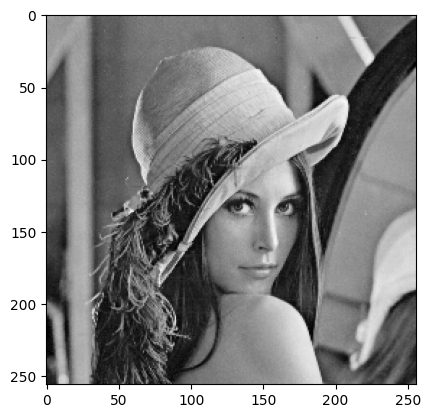

In [21]:
img = plt.imread('data/lena.png')
plt.imshow(img, 'gray')

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [62]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        if n <= p[0] < img.shape[0] - n and n <= p[1] < img.shape[1] - n:
            neighbourhood_sum = 0
            for q in numpy.ndindex(size, size):
                neighbourhood_sum += img[p[0]-n+q[0], p[1]-n+q[1]]
                result[p] = neighbourhood_sum / size**2
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

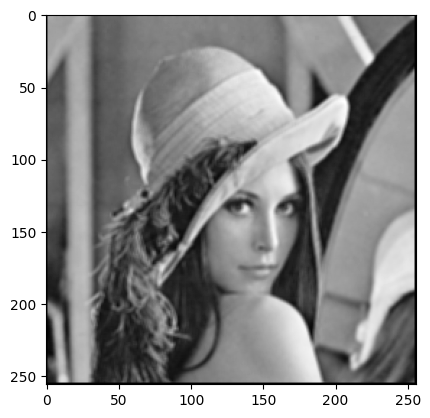

In [63]:
img1_mean = meanfilter(img, 3)
plt.imshow(img1_mean, 'gray')

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

In [31]:
img5_0 = plt.imread('data/lena_meanfilter5.png')
img5_1 = meanfilter(img, 5)
assert numpy.allclose(img5_0, img5_1, atol=1/255)


---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [38]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        if n <= p[0] < img.shape[0] - n and n <= p[1] < img.shape[1] - n:
            median = list()
            for q in numpy.ndindex(size, size):
                median.append(img[p[0] - n + q[0], p[1] - n + q[1]])
            result[p] = sorted(median)[((size**2)+1)//2]
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

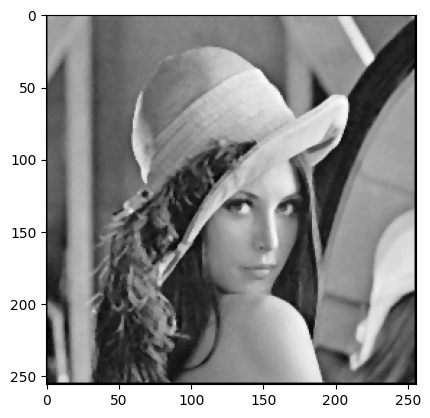

In [36]:
plt.imshow(medianfilter(img, 3), 'gray')

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

In [43]:
img5_median = plt.imread('data/lena_medianfilter5.png')
img5_median2 = medianfilter(img, 5)
#plt.imshow(img5_median2)
#plt.imshow(img5_median)
assert numpy.allclose(img5_median, img5_median2, atol=1/255)

AssertionError: 

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [44]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

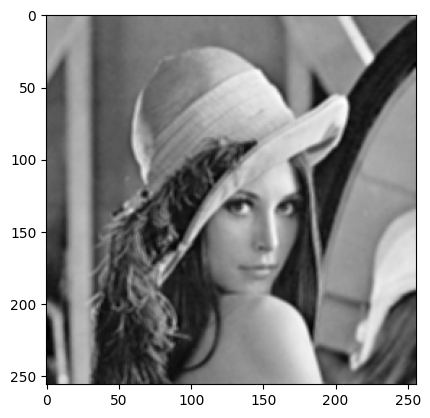

In [46]:
plt.imshow(scipy.ndimage.uniform_filter(img, 3), 'gray')

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

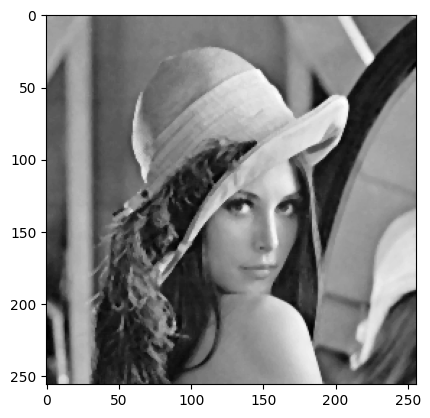

In [47]:
plt.imshow(scipy.ndimage.median_filter(img, 3), 'gray')

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

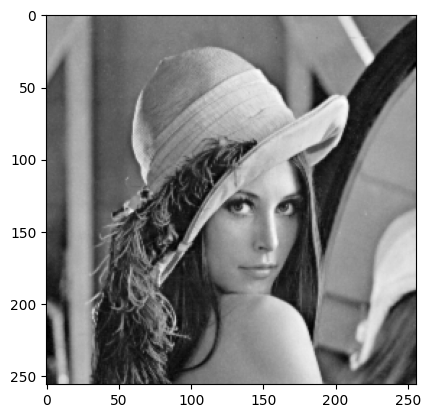

In [50]:
plt.imshow(scipy.ndimage.gaussian_filter(img, 0.5), 'gray')

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

no borders.

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [65]:
def fastfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        if n <= p[0] < img.shape[0] - n and n <= p[1] < img.shape[1] - n:
            result[p] = img[p[0]-n:p[0]+n+1, p[1]-n:p[1]+n+1].mean()
    return result

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

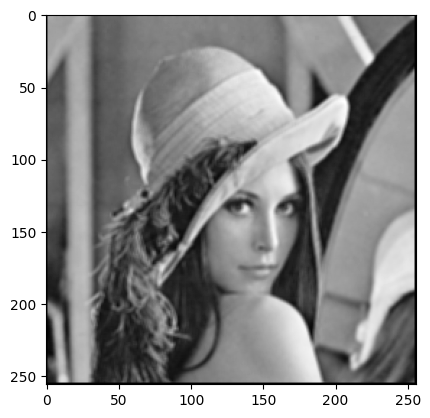

In [54]:
plt.imshow(fastfilter(img, 3), 'gray')

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

In [66]:
assert numpy.allclose(meanfilter(img, 5), fastfilter(img, 5), atol=1/255)

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

In [68]:
%timeit fastfilter(img, 9)
%timeit meanfilter(img, 9)

424 ms ± 40.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.17 s ± 155 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation:

Fast filter: 424 ms ± 40.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Mean filter: 4.17 s ± 155 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)